In [ ]:
import plotly.express as px
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

The **computer science department at Texas Southern University** wants to increase its recruitment efforts to local Houston high schools. To achieve this goal, they need to **understand the factors that influence high school students to choose computer science as a major**. 1000 students were surveyed. Unfortunately the data is not perfect, some of the data is missing, but we still must find insights.


In [ ]:
df = pd.read_csv("TSU_Hackathon_Schema-2.csv")
df.head(10)

,id,first_name,last_name,ethnicity,gender,classification,high_school,career_interest,weekly_hours_studied,gpa,math_classes_taken,computers_owned,applied_to_tsu
0,1,Cacilia,Barbera,White,Female,Freshman,Eastwood Academy,Engineering,0,3.4,1,1,1
1,2,Reinhard,Eisikovitsh,American Indian/Alaska Native,Male,Sophomore,Challenge Early College High School,Engineering,10,3.7,2,5+,0
2,3,Klara,Marcinkowski,White,Female,Sophomore,James Madison High School,Agriculture,5,2.5,2,0,0
3,4,Ellen,Giabucci,Asian,Female,Junior,Challenge Early College High School,Advertising/marketing,0,3.6,1,1,1
4,5,Nahum,Vern,Multicultural,Male,Senior,Phillis Wheatley High School,Engineering,15,3.8,3,4,1
5,6,Aretha,Themann,Asian,Female,Senior,Carnegie Vanguard High School,Multimedia,5,2.3,4,4,1
6,7,Basilio,Daunay,Multicultural,Male,Senior,Westbury High School,Education,15,3.8,5,3,1
7,8,Jolynn,Kneale,Hispanic/Latino,Female,Junior,Stephen P. Waltrip High School,Advertising/marketing,15,3.9,2,2,0
8,9,Robbyn,Elis,Hispanic/Latino,Female,Freshman,Stephen F. Austin High School,Entertainment,15,3.6,1,3,1
9,10,Samaria,Worgen,Hispanic/Latino,Female,Junior,Energy Institute High School,Engineering,5,2.2,3,3,0


Checking for **NULL** values in the data. 

(1000, 13)

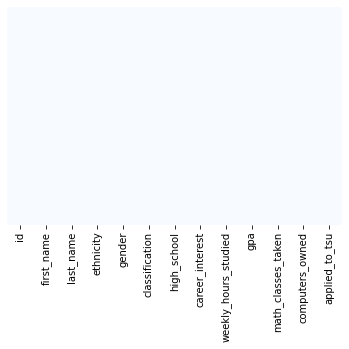

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='Blues')
df.shape

There are **13** attributes and 1000 **records** in this dataset. Let's do some experimenting with plots on smaller aggregations. Firstly, let's try ethnicity and gender as the *feature vector* and career interest as our *target*. Our first aggregation will be *ethnicity* and *gender* against our common target *career interest*. We binarize the career interest; for those interested in *engineering*, we place a 1, and for every other field we place a 0.

In [ ]:
print(df["career_interest"].unique())
df['career_interest'] = df["career_interest"].replace(['Agriculture', 'Advertising/marketing', 'Multimedia',
 'Education', 'Entertainment', 'Medical', 'Fashion', 'Finance'], 0)
df['career_interest'] = df["career_interest"].replace(['Engineering'], 1)
df['computers_owned'] = df['computers_owned'].replace(['5+'], 5)
df['computers_owned'] = df['computers_owned'].replace(['1'], 1)
df['computers_owned'] = df['computers_owned'].replace(['0'], 0)
df['computers_owned'] = df['computers_owned'].replace(['2'], 2)
df['computers_owned'] = df['computers_owned'].replace(['3'], 3)
df['computers_owned'] = df['computers_owned'].replace(['4'], 4)

# one hot encoding for the ethnicity
# df['ethnicity']=df['ethnicity'].factorize()[0]
# df['gender']=df['gender'].factorize()[0]
# df['high_school']=df['high_school'].factorize()[0]
# df.head(100)


[1 0]


In [ ]:
ethn = df.groupby(['ethnicity']).agg({'career_interest':'sum'}) # 1
gen = df.groupby(['gender']).agg({'career_interest':'sum'}) # 1
hs = df.groupby(['high_school']).agg({'career_interest':'sum'}) # 1
grade_point_avg = df.groupby(['gpa']).agg({'career_interest' : 'sum'}) # 0
classification = df.groupby(['classification']).agg({'career_interest': 'sum'}) # 0
computers = df.groupby(['computers_owned']).agg({'career_interest' : 'sum'}) # 1
wkly = df.groupby(['weekly_hours_studied']).agg({'career_interest' : 'sum'}) # 1
math = df.groupby(['math_classes_taken']).agg({'career_interest' : 'sum'}) # 1
gen.head(30)

,career_interest
gender,
Agender,3
Bigender,2
Female,65
Genderfluid,4
Genderqueer,4
Male,61
Non-binary,2
Polygender,1


In [ ]:
fig1 = px.histogram(df,x=['ethnicity','gender'],y='career_interest', title='Career Interests by Ethnicity & Gender', \
                    labels={'value':'Ethnicity/Gender', 'variable':'Attributes'})
fig1.show()

In [ ]:
fig2 = px.histogram(df,x='high_school', y='career_interest', title='Career Interests by High School', \
                    labels={'high_school':'High School', 'career_interest':'Career Interest'})
fig2.show()

In [ ]:
fig3 = px.bar(df,x=['math_classes_taken'],y='career_interest', title='Career Interests by Amount of Math Taken', \
                    labels={'value' : 'Math Classes Taken','career_interest' : 'Career Interest', 'variable' : 'Attributes'})
fig3.show()

In [ ]:
fig4 = px.bar(df,x=['computers_owned'],y='career_interest', title='Career Interests by Computers Owned',\
              labels={'value' : 'Computers Owned','career_interest' : 'Career Interest', 'variable' : 'Attributes'})
fig4.show()

In [ ]:
fig5 = px.bar(df,x=['weekly_hours_studied'],y='career_interest', title='Career Interests by Hours Studied per Week',\
              labels={'value' : 'Hours Studied', 'career_interest' : 'Career Interest', 'variable' : 'Attributes'})
fig5.show()